# How to Fit a Step? 
## Test example

We are going to use scipy to create a data having a step, i.e. a y-offset. The data will be the combination of two samples of 300 element each:

* DataA with x-values between [0,10] and with y-value normally distributed around -0.5, with a dispersion of 0.6 ; each point has a y-err of 0.3.

* DataB with x-values between [10,20] and with y-value normally distributed around 0.7, with a dispersion of 0.7 ; each point has a y-err of 0.4.


#### Basic ipython notebook import 

In [1]:
# plot within the notebook
%matplotlib inline
import warnings
# No annoying warnings
warnings.filterwarnings('ignore')
# Because we always need that
import numpy as np

## Creation of the data points

In [2]:
# Structure of the _data: [x,y,yerr]
npointa,npointb = 100,100

adata = np.asarray([np.random.rand(npointa)*10, np.random.normal(loc=-0.5,scale=0.6,size=npointa), [0.3]*npointa])
bdata = np.asarray([np.random.rand(npointb)*10+10, np.random.normal(loc=0.7,scale=0.7,size=npointb), [0.5]*npointb])


Let's see how it looks like

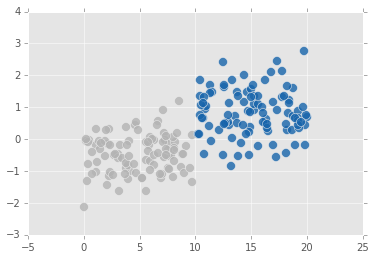

In [3]:
import matplotlib.pyplot as mpl
mpl.style.use('ggplot')
mpl.scatter(adata[0],adata[1], s=80, facecolors=mpl.cm.binary(0.3,0.8))
mpl.scatter(bdata[0],bdata[1], s=80, facecolors=mpl.cm.Blues(0.8,0.8))

# Fit the Step `modefit.stepfit`

In [4]:
import modefit
reload(modefit.fitter.bimodal)

<module 'modefit.fitter.bimodal' from '/Users/mrigault/Libraries/modefit/fitter/bimodal.pyc'>

Load the stepfit object that enables the fit

In [5]:
step = modefit.stepfit(np.concatenate([adata[0],bdata[0]]), 
                           np.concatenate([adata[1],bdata[1]]), 
                           np.concatenate([adata[2],bdata[2]]),
                          xcut = 10)

Perform the fit and provide the initial conditions. You have 3 model's parameter characteristics you can set:

* x`_guess` : initial guess for the "x" parameter
* x`_boundaries`: fit boundaries for the "x" parameter
* x`_fixed`: Set this to True to fixe the parameter to its `_guess` value

"x" could be any `freeparamters` of the model. You do not have to fill the entries

In [6]:
step.fit(sigma_a_guess=0.5,sigma_b_guess=0.5, mean_a_guess=-.5,mean_b_guess=0.5)

STARTS MINUIT FIT


FCN = 393.420840731 
 TOTAL NCALL = 74 
 NCALLS = 74 
 
 
 EDM = 3.33516512905e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,mean_a,-0.453799,0.0582246,0,0,,,
2,sigma_a,0.499009,0.0480467,0,0,,,
3,mean_b,0.816294,0.0719124,0,0,,,
4,sigma_b,0.516855,0.0707537,0,0,,,


Now that fit has been performed, you best fitted values will be displayed in the plot

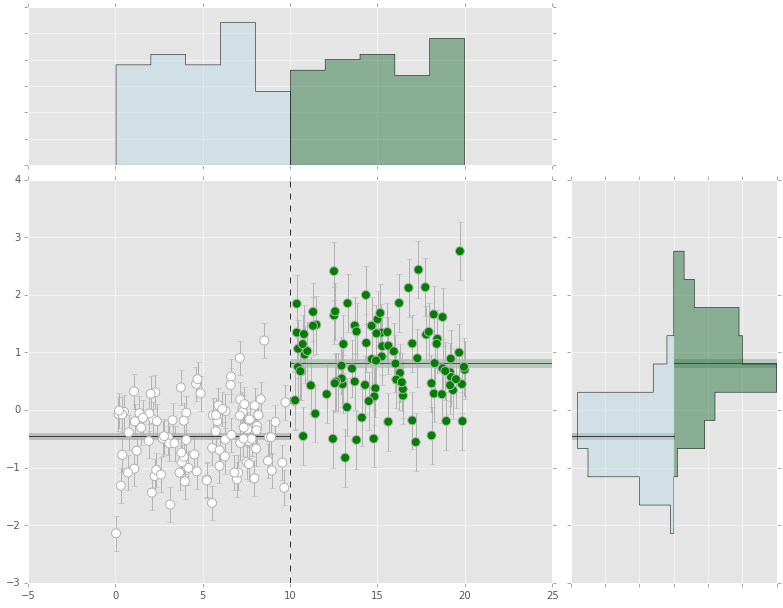

In [7]:
step.show()

# MCMC approach

A mcmc package is included in the models and fitter. By default, the prior information are flat (no prior information). Change that by inheriting the class to create your own!

*this is slower*

In [8]:
step.run_mcmc(500)

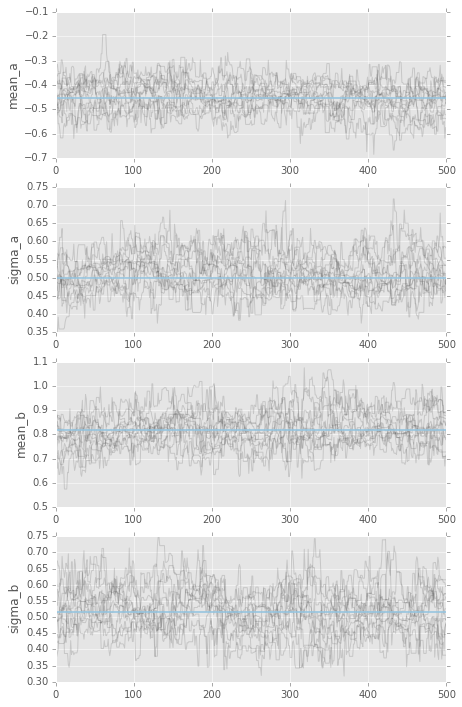

In [9]:
step.mcmc.show_walkers()

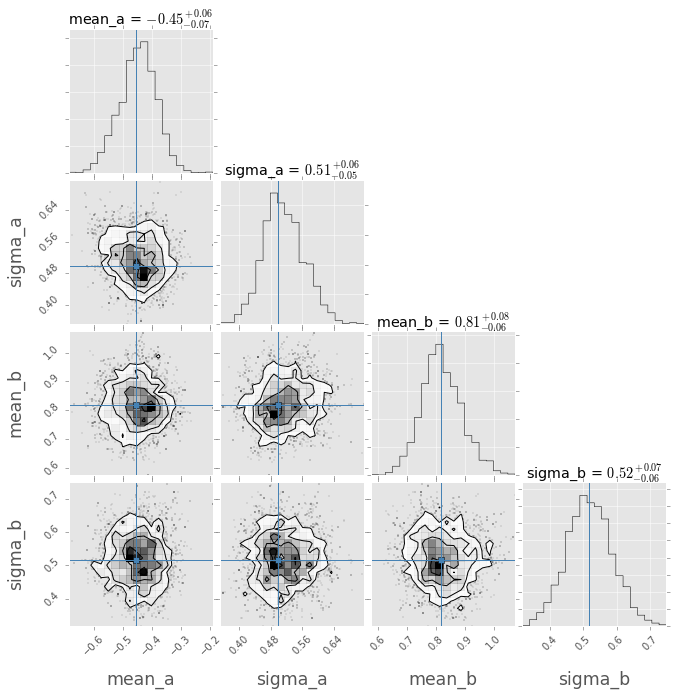

In [10]:
step.mcmc.set_burnin(1)
step.mcmc.show_corner()